<a href="https://colab.research.google.com/github/michaelbram10/Case-Study-02-Data-Mining---Customer-Segmentation---Ganjil-2022---Kelompok-3/blob/main/Exploratory_Data_Analysis_Study_Case_2_Kel_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Packages
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

import random as rn

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/michaelbram10/Case-Study-02-Data-Mining---Customer-Segmentation---Ganjil-2022---Kelompok-3/main/Data%20MixITUp%20Hasil%20Cleansing.csv')
df.head()

,Unnamed: 0,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,0,Wanita,49.0,13114754.0,52.0,1,Jakarta,1.0,Sabtu,2.0
1,1,Wanita,32.0,33606557.0,86.0,1,Depok,1.0,Minggu,6.0
2,2,Pria,51.0,15983606.0,41.0,1,Jakarta,2.0,Minggu,3.0
3,3,Pria,19.0,12704918.0,55.0,0,Jakarta,1.0,Rabu,7.0
4,4,Wanita,38.0,20081967.0,42.0,1,Jakarta,2.0,Senin,8.0


In [ ]:
#Statistika deskriptif
df.describe()

,Unnamed: 0,Umur,Pendapatan-per-bulan,skor-pengeluaran,Promo,FavFlavor
count,190.000000,190.000000,1.900000e+02,190.000000,190.000000,190.000000
mean,99.663158,37.389474,1.875324e+07,50.452632,1.668421,3.568421
std,57.914023,12.158821,1.077900e+07,26.156537,0.970765,2.762763
min,0.000000,2.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,50.250000,28.000000,1.116803e+07,34.250000,1.000000,1.000000
50%,99.500000,36.000000,1.926230e+07,50.000000,1.000000,3.000000
75%,149.750000,47.750000,2.581967e+07,73.000000,3.000000,6.000000
max,199.000000,60.000000,5.000000e+07,101.000000,5.000000,9.000000


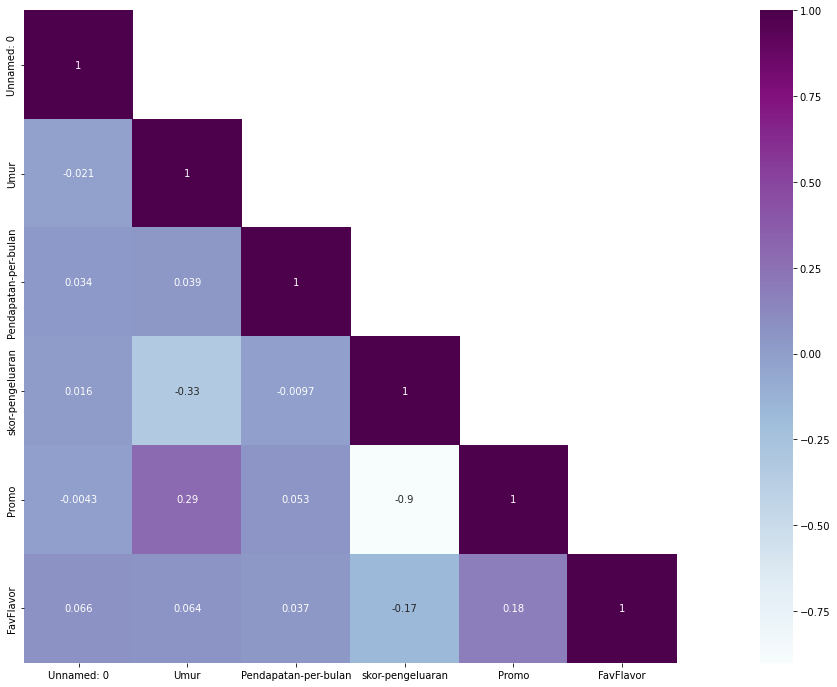

In [ ]:
#Heatmap untuk melihat nilai koefisien korelasi antar variabel
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap='BuPu')

Berdasarkan hasil heatmap di atas, maka diperoleh bahwa promo dengan skor pengeluaran memiliki korelasi negatif yang cukup kuat (mendekati -1). Hal ini berarti, semakin sering customer menggunakan promo, maka akan semakin sedikit pengeluaran customer tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

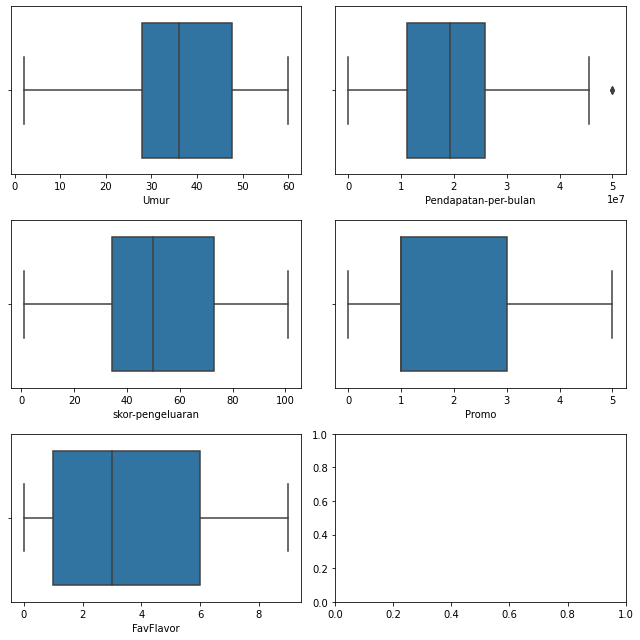

In [ ]:
#Boxplot untuk melihat adanya outlier
fig,ax = plt.subplots(3,2, figsize=(9,9)) 
sns.boxplot(df['Umur'], ax = ax[0,0]) 
sns.boxplot(df['Pendapatan-per-bulan'], ax = ax[0,1]) 
sns.boxplot(df['skor-pengeluaran'], ax = ax[1,0])
sns.boxplot(df['Promo'], ax = ax[1,1])
sns.boxplot(df['FavFlavor'], ax = ax[2,0]) 
plt.tight_layout()
plt.show()

Dari boxplot di atas, dapat di lihat bahwa variabel Pendapatan per bulan memiliki outlier. Namun Outlier tersebut masih dapat ditoleransi.

In [ ]:
#Barplot
#categorical
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Jenis Kelamin', 'Menikah', 'Kota', 'HariFav'], dtype='object')

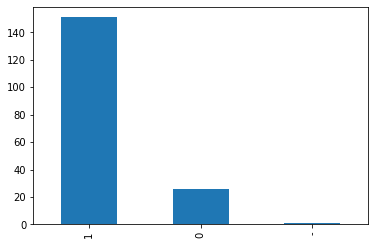

In [ ]:
plot = df.Menikah.value_counts().plot(kind='bar') 

#Upload Visualisasi

![picture](https://drive.google.com/uc?export=view&id=1VOf56HZC0f7owbC7sqRzbHQ1i6oNrmoJ)

Berdasarkan grafik di atas, dapat dilihat bahwa Customer yang sering menggunakan Promo berdomisili di Tangerang

![picture](https://drive.google.com/uc?export=view&id=1oRgkt1VM01KcJboMy-_JZ2oQchBvRSD3)




Berdasarkan grafik di atas, Customer yang paling banyak menyukai semua Flavor es krim berdomisili di Jakarta

![picture](https://drive.google.com/uc?export=view&id=1XKo71gVeMvJn0dND47sVi7jmlHWPtJzt)

Berdasarkan grafik di atas, maka persebaran Customer cukup merata pada semua Kota, tidak ada perbedaan yang signifikan.